# Assignment 15 - Random Forest (Company Data)

### Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
#importing liabraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
df.loc[df["Sales"] <= 10.00,"Sales1"]="Not High"
df.loc[df["Sales"] >= 10.01,"Sales1"]="High"
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


In [7]:
# find categorical variables in training data set

traincategorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(traincategorical)))

print('The categorical variables are :\n\n', traincategorical)

There are 4 categorical variables

The categorical variables are :

 ['ShelveLoc', 'Urban', 'US', 'Sales1']


In [8]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['Sales1']= label_encoder.fit_transform(df['Sales1']) 

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [10]:
def min_max_scaler(i):
    data= pd.DataFrame(i)
    df_norm=  (data-data.min())/(data.max()-data.min())
    return df_norm
df = min_max_scaler(df)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,0.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,0.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,1.0


In [11]:
#split the data into dependant and independant variable
X = df.iloc[:,1:11]
y = df['Sales1']


In [12]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [13]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: Sales1, Length: 400, dtype: float64

In [19]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

In [20]:
model = RandomForestRegressor(n_estimators=5,max_depth=8,random_state=42,min_samples_split=3,max_features=10)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=10, min_samples_split=3,
                      n_estimators=5, random_state=42)

In [21]:
# Use the forest's predict method on the test data
predictions = model.predict(x_test)
model.base_estimator_.fit(x_train,y_train)

DecisionTreeRegressor()

[Text(456.28125, 518.8909090909091, 'Price <= 0.392\nmse = 0.158\nsamples = 320\nvalue = 0.803'),
 Text(133.6875, 469.4727272727273, 'CompPrice <= 0.23\nmse = 0.242\nsamples = 39\nvalue = 0.41'),
 Text(46.5, 420.05454545454546, 'Education <= 0.812\nmse = 0.173\nsamples = 9\nvalue = 0.778'),
 Text(23.25, 370.6363636363636, 'mse = 0.0\nsamples = 6\nvalue = 1.0'),
 Text(69.75, 370.6363636363636, 'Advertising <= 0.069\nmse = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(46.5, 321.21818181818185, 'mse = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(93.0, 321.21818181818185, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(220.875, 420.05454545454546, 'ShelveLoc <= 0.25\nmse = 0.21\nsamples = 30\nvalue = 0.3'),
 Text(162.75, 370.6363636363636, 'CompPrice <= 0.454\nmse = 0.234\nsamples = 8\nvalue = 0.625'),
 Text(139.5, 321.21818181818185, 'mse = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(186.0, 321.21818181818185, 'Age <= 0.973\nmse = 0.188\nsamples = 4\nvalue = 0.25'),
 Text(162.75, 271.8, 'mse = 0.0\nsampl

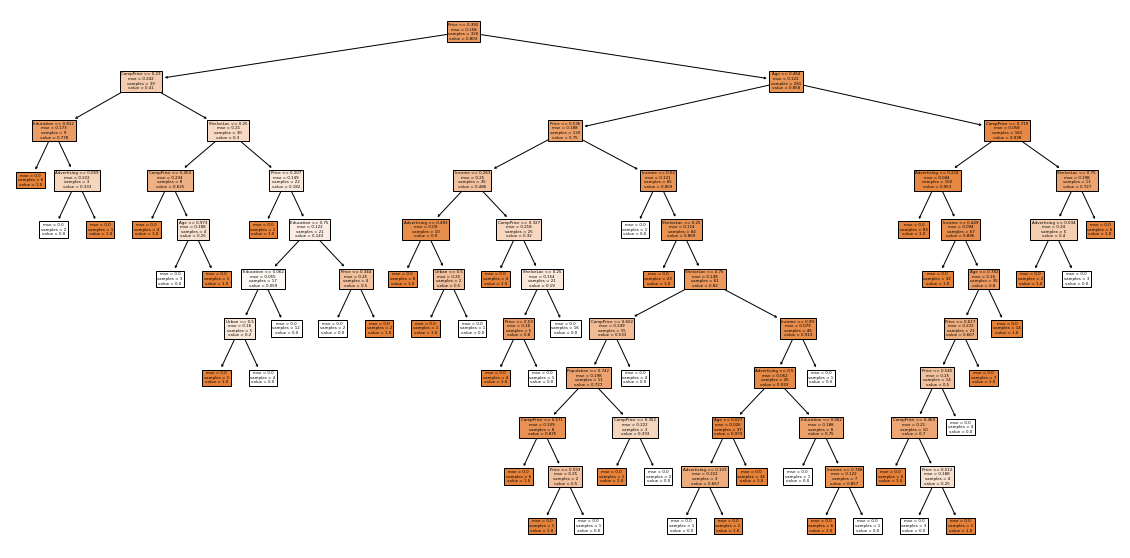

In [22]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High','High']
plt.figure(figsize=(20,10))

tree.plot_tree(model.base_estimator_,feature_names=fn,class_names=cn,filled=True)

In [23]:
y_pred = model.predict(x_test)
y_pred.mean()

0.8080075452716298

In [24]:
1-mape(y_test,y_pred)

-491214045071052.5

In [25]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.22 degrees.
